In [1]:
#### Importamos las librerias necesarias para el desarrollo del ejercicio
### Antes instalamos las librerias necesarias en consola

import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.linear_model import LogisticRegression
# import some data to play with
iris = datasets.load_iris()
import pandas as pd
# Creamos un dataframe con los datos de iris
iris_df = pd.DataFrame(data=iris.data, columns=iris.feature_names)
Y = iris.target
### Serie de pandas para la variable dependiente
Y_df = pd.Series(Y, name='species')
DF_total= pd.concat([iris_df, Y_df], axis=1)
modelo_log = LogisticRegression(random_state=42, max_iter=1000)

In [2]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(iris_df, Y_df, test_size=0.3, random_state=42)
modelo_log.fit(X_train, y_train)

LogisticRegression(max_iter=1000, random_state=42)

In [3]:
#Evaluación del modelo
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test, modelo_log.predict(X_test))

array([[19,  0,  0],
       [ 0, 13,  0],
       [ 0,  0, 13]], dtype=int64)

In [4]:
Yi_df=pd.DataFrame(y_test)
pred=pd.DataFrame(modelo_log.predict_proba(X_test),index=Yi_df.index) # tenenoos que fijar los indices de Y por que si no no me trae la ubicación de las observaciones de test
DF_revisión=pd.concat([Yi_df,pred],axis=1)
DF_revisión.columns = ['real', 'SPC1','SPC2','SPC3']
DF_revisión

,real,SPC1,SPC2,SPC3
73,1,4.099692e-03,0.812344,1.835564e-01
18,0,9.419554e-01,0.058044,5.802027e-07
118,2,1.584118e-08,0.002091,9.979087e-01
78,1,6.824914e-03,0.773251,2.199236e-01
76,1,1.594009e-03,0.751206,2.471999e-01
31,0,9.500409e-01,0.049959,4.588197e-07
64,1,7.780261e-02,0.904145,1.805245e-02
141,2,1.798366e-04,0.147358,8.524624e-01
68,1,2.422560e-03,0.780452,2.171251e-01
82,1,2.899835e-02,0.940819,3.018308e-02


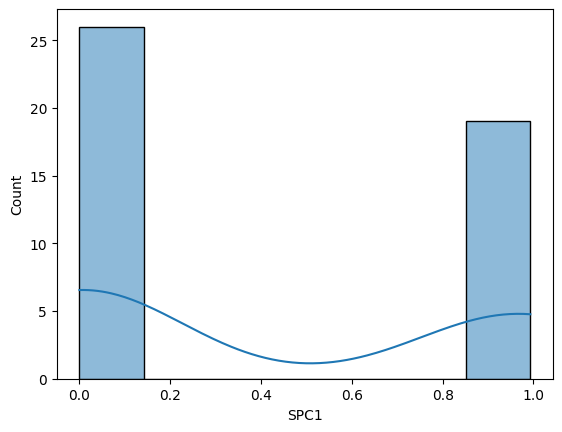

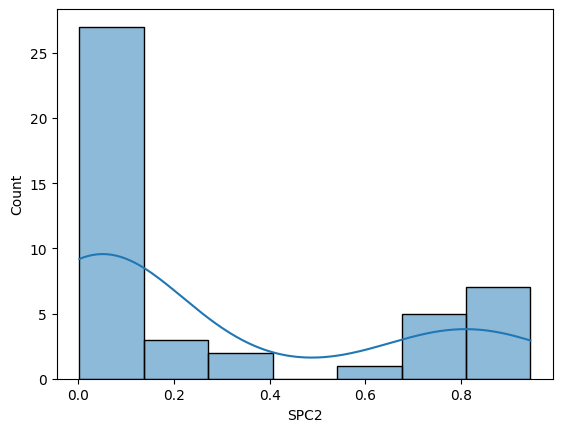

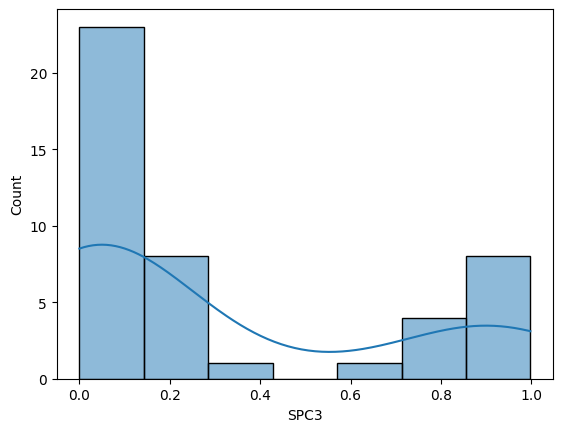

In [5]:
## Ejemplo Curva ROC

## Histograma suavizado de las predicciones

import seaborn as sns
sns.histplot(data=DF_revisión, x="SPC1", kde=True)
plt.show()

import seaborn as sns
sns.histplot(data=DF_revisión, x="SPC2", kde=True)
plt.show()

import seaborn as sns
sns.histplot(data=DF_revisión, x="SPC3", kde=True)
plt.show()
  

In [6]:
modelo_log.predict_proba(X_test)

array([[4.09969244e-03, 8.12343944e-01, 1.83556364e-01],
       [9.41955397e-01, 5.80440227e-02, 5.80202743e-07],
       [1.58411850e-08, 2.09129300e-03, 9.97908691e-01],
       [6.82491411e-03, 7.73251484e-01, 2.19923602e-01],
       [1.59400899e-03, 7.51206079e-01, 2.47199912e-01],
       [9.50040927e-01, 4.99586145e-02, 4.58819656e-07],
       [7.78026097e-02, 9.04144937e-01, 1.80524537e-02],
       [1.79836561e-04, 1.47357748e-01, 8.52462415e-01],
       [2.42256024e-03, 7.80452358e-01, 2.17125082e-01],
       [2.89983536e-02, 9.40818564e-01, 3.01830820e-02],
       [4.73571636e-04, 2.25282385e-01, 7.74244043e-01],
       [9.62693650e-01, 3.73061654e-02, 1.84138329e-07],
       [9.69162359e-01, 3.08375443e-02, 9.66509711e-08],
       [9.56006699e-01, 4.39930360e-02, 2.65383076e-07],
       [9.76521678e-01, 2.34781328e-02, 1.89458570e-07],
       [4.76688194e-03, 6.63398961e-01, 3.31834158e-01],
       [9.67229639e-06, 2.67217718e-02, 9.73268556e-01],
       [2.76880884e-02, 9.45164

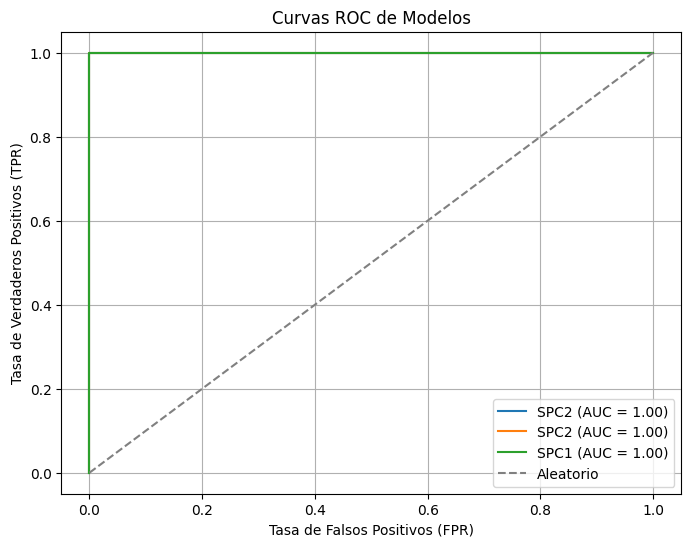

In [11]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import make_classification
from sklearn.metrics import roc_curve, roc_auc_score
### Curva ROC
y_pred_proba= modelo_log.predict_proba(X_test)

## Curva ROC
## Curva ROC

fpr, tpr, thresholds = roc_curve(y_test, DF_revisión['SPC2'], pos_label=1)
fprr, tprr, thresholdsr = roc_curve(y_test, DF_revisión['SPC1'], pos_label=0)
fprrr, tprrr, thresholdsrr = roc_curve(y_test, DF_revisión['SPC3'], pos_label=2)
auc_model1 = auc(fpr, tpr)
auc_model2 = auc(fprr, tprr)
auc_model3 = auc(fprrr, tprrr)


plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f'SPC2 (AUC = {auc_model1:.2f})')
plt.plot(fprr, tprr, label=f'SPC2 (AUC = {auc_model2:.2f})')
plt.plot(fprrr, tprrr, label=f'SPC1 (AUC = {auc_model3:.2f})')
plt.plot([0, 1], [0, 1], linestyle='--', color='gray', label='Aleatorio')
plt.xlabel('Tasa de Falsos Positivos (FPR)')
plt.ylabel('Tasa de Verdaderos Positivos (TPR)')
plt.title('Curvas ROC de Modelos')
plt.legend()
plt.grid(True)
plt.show()
